In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv("Weather.csv")

dataset.describe()

C:\Users\bossv\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


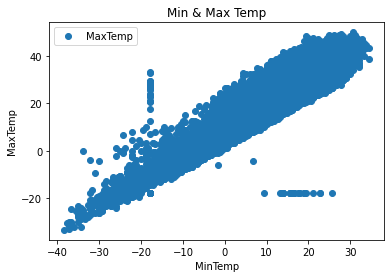

In [35]:
dataset.plot(x = "MinTemp",y = "MaxTemp",style="o")
plt.title("Min & Max Temp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

In [41]:
#train & test set
x = dataset["MinTemp"].values.reshape(-1,1)
y = dataset["MaxTemp"].values.reshape(-1,1)

# 80% - 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#training
model = LinearRegression()
model.fit(x_train,y_train)

#test
y_pred = model.predict(x_test)

#compare true data & predict data
df = pd.DataFrame({"Actuall":y_test.flatten(),"Predicted":y_pred.flatten()})
print("MAE : ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Score : ",metrics.r2_score(y_test,y_pred))
df

MAE :  3.1993291783785835
MSE :  17.631568097568532
RMSE :  4.198996082109215
Score :  0.7670218843587753


,Actuall,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


In [75]:
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 5"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

def displayImge(x):
    plt.imshow(x.reshape(28,28),cmap=plt.cm.binary,interpolation="nearest")
    plt.show()

def displayPredict(clf,actually_y,x):
    print("Actually = ",actually_y)
    print("Pridiction = ",clf.predict([x])[0])

In [71]:
from scipy.io import loadmat
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

mnist_raw = loadmat("mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

x,y = mnist["data"],mnist["target"]
#training,test
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

#class 0,ไม่ใช่ class 0
predict_number = 5500
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)

score = cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

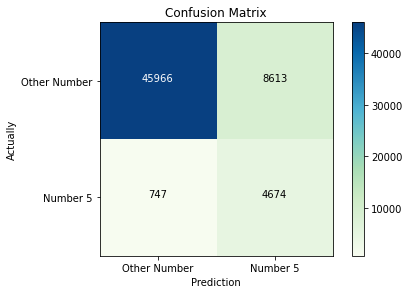

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)
cm = confusion_matrix(y_train_5,y_train_predict)

plt.figure()
displayConfusionMatrix(cm)

In [76]:
y_test_pred = sgd_clf.predict(x_test)

classes = ["Other Number","Number 5"]
print(classification_report(y_test_5,y_test_pred,target_names=classes))
print("Accuracy Score = ",accuracy_score(y_test_5,y_test_pred)*100)

              precision    recall  f1-score   support

Other Number       0.96      1.00      0.98      9108
    Number 5       0.94      0.55      0.70       892

    accuracy                           0.96     10000
   macro avg       0.95      0.77      0.84     10000
weighted avg       0.96      0.96      0.95     10000

Accuracy Score =  95.71
